# 📖 Academic Explanation: Post-Tuning the Decision Threshold

---

## 1. Problem Context
Most supervised classification models (e.g., logistic regression, SVMs with probability calibration, neural networks) output **probability scores** rather than hard labels.  
By default, a threshold of **0.5** is applied to assign classes.  

- However, this fixed cutoff is often **suboptimal**, especially in domains where **false positives and false negatives carry different costs**:
  - **Medical diagnosis:** missing a disease (FN) is costlier than a false alarm (FP).
  - **Fraud detection:** false alarms (FP) can overwhelm human reviewers.
  - **Spam filtering:** precision and recall must be balanced depending on tolerance for spam vs. missed emails.

---

## 2. Conceptual Foundation
Post-tuning adjusts the threshold **$\tau$** to optimize a chosen metric rather than relying on the default 0.5.

For a classifier outputting probability scores:

$$
\hat{p}(y=1|x),
$$

the decision rule is:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \hat{p}(y=1|x) \geq \tau \\
0 & \text{otherwise}
\end{cases}
$$

- **Default:** $\tau = 0.5$  
- **Optimized:** $\tau$ chosen based on precision, recall, F1, or cost-sensitive metrics.

---

## 3. Performance Metrics and Trade-offs

- **Precision**  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (Sensitivity)**  
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **F1-score (Harmonic mean of precision & recall)**  
$$
F_1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **ROC Curve:** plots  

$$
TPR = \frac{TP}{TP+FN}, \quad FPR = \frac{FP}{FP+TN}
$$  

across thresholds.

- **Precision–Recall Curve:**  
More informative under **class imbalance**, visualizing the precision–recall trade-off as $$\tau$ changes.

Thus, **post-tuning converts threshold selection into an optimization problem**, adapting the model to specific operational goals.

---

## 4. Academic Significance

- **Imbalanced datasets:** $\tau = 0.5$ may bias predictions toward the majority class.  
- **Cost-sensitive learning:** optimal threshold minimizes **expected risk**:

$$
\tau^* = \frac{C_{FN}}{C_{FP} + C_{FN}}
$$


where:
- $C_{FN}$ = cost of false negatives  
- $C_{FP}$ = cost of false positives  

**Domain-specific tuning:**
- **Medical AI:** prioritize **high recall** (avoid missed diagnoses).  
- **Fraud detection:** prioritize **high precision** (reduce false alarms).  

---

## 5. Conclusion
Post-tuning the decision threshold decouples **probability estimation** from **decision-making**.  
This enables adaptation to **domain-specific objectives** such as fairness, regulatory compliance, and ethical trade-offs.  

It is therefore a **critical best practice** in **responsible AI deployment**, ensuring that models are not only accurate but also **aligned with real-world operational constraints**.


# 📐 Mathematical & Statistical Foundations of Decision Threshold Tuning

---

## 1. Basic Classification Rule
For a classifier outputting probability estimates:

$$
\hat{p}(y=1|x),
$$

the prediction is made as:

$$
\hat{y} =
\begin{cases}
1 & \text{if } \hat{p}(y=1|x) \geq \tau \\
0 & \text{otherwise}
\end{cases}
$$

where **$\tau$** is the decision threshold (default: $\tau = 0.5$).

---

## 2. Confusion Matrix Quantities
From counts of $TP$, $FP$, $TN$, $FN$ we define:

- **Accuracy**  
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Precision**  
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (Sensitivity, TPR)**  
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **Specificity (TNR)**  
$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

- **F1-score**  
$$
F_1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

## 3. ROC Curve & AUC
Threshold-dependent rates:

$$
TPR(\tau) = \frac{TP}{TP + FN},
\quad
FPR(\tau) = \frac{FP}{FP + TN}
$$

The **AUC** integrates the trade-off:

$$
AUC = \int_0^1 TPR\big(FPR^{-1}(x)\big)\, dx
$$

---

## 4. Precision–Recall Curve
As functions of the threshold:

$$
P(\tau) = \frac{TP(\tau)}{TP(\tau) + FP(\tau)},
\quad
R(\tau) = \frac{TP(\tau)}{TP(\tau) + FN(\tau)}
$$

This curve is more informative than ROC under **class imbalance**.

---

## 5. Cost-Sensitive Threshold
If false negatives (FN) and false positives (FP) incur different costs:

$$
\tau^* = \frac{C_{FN}}{C_{FN} + C_{FP}}
$$

with expected cost:

$$
R(\tau) = C_{FN}\cdot P(y=1)\cdot (1 - TPR(\tau))
+ C_{FP}\cdot P(y=0)\cdot FPR(\tau)
$$

---

## 6. Bayes Optimal Threshold
Minimizing expected risk under priors:

$$
\tau^* = \frac{P(y=0)\cdot C_{FP}}
{P(y=1)\cdot C_{FN} + P(y=0)\cdot C_{FP}}
$$

This generalizes the 0.5 threshold to reflect **class priors** and **misclassification costs**.

---

## 7. Calibration Link (Platt Scaling)
When probability calibration is applied (e.g., SVM outputs):

$$
\hat{p}(y=1|x) = \frac{1}{1 + \exp(A f(x) + B)}
$$

where $f(x)$ is the raw decision function and $A, B$ are calibration parameters.  
Threshold tuning then operates on **calibrated probabilities**.

---

## ✅ Summary
- Threshold tuning is **not arbitrary**: it is grounded in **metrics, ROC/PR analysis, and cost-sensitive risk minimization**.  
- Default $\tau = 0.5$ only works under balanced classes & equal costs.  
- **Optimal $\tau$** depends on application: medical (recall priority), fraud detection (precision priority), etc.  


# 📚 Academic Works on Post-Tuning the Decision Threshold

---

## 1. ROC Analysis & Threshold Selection
- **Neyman, J., & Pearson, E. S. (1933).** On the problem of the most efficient tests of statistical hypotheses. *Philosophical Transactions of the Royal Society of London.*  
  ➝ Introduced the Neyman–Pearson lemma, the foundation of optimal thresholds under hypothesis testing.

- **Hanley, J. A., & McNeil, B. J. (1982).** The meaning and use of the area under a receiver operating characteristic (ROC) curve. *Radiology.*  
  ➝ Popularized ROC and AUC as evaluation metrics for threshold-based classifiers.

- **Fawcett, T. (2006).** An introduction to ROC analysis. *Pattern Recognition Letters.*  
  ➝ Influential tutorial on ROC, threshold tuning, and evaluation of classifier performance.

---

## 2. Precision–Recall and Imbalanced Data
- **Davis, J., & Goadrich, M. (2006).** The relationship between Precision-Recall and ROC curves. *ICML.*  
  ➝ Key paper explaining why precision–recall curves are more informative than ROC under class imbalance.

- **Saito, T., & Rehmsmeier, M. (2015).** The precision-recall plot is more informative than the ROC plot when evaluating binary classifiers on imbalanced datasets. *PLOS ONE.*  
  ➝ Reinforces the superiority of PR curves for threshold optimization in imbalanced scenarios.

---

## 3. Cost-Sensitive Thresholding
- **Elkan, C. (2001).** The foundations of cost-sensitive learning. *IJCAI.*  
  ➝ Formalized threshold selection under asymmetric misclassification costs.

- **Domingos, P. (1999).** MetaCost: A general method for making classifiers cost-sensitive. *KDD.*  
  ➝ Introduced a practical framework for adjusting decision thresholds with cost sensitivity.

---

## 4. Probability Calibration & Thresholding
- **Platt, J. (1999).** Probabilistic outputs for support vector machines and comparisons to regularized likelihood methods. *Advances in Large Margin Classifiers.*  
  ➝ Introduced Platt scaling, enabling calibrated probability estimates prior to threshold tuning.

- **Niculescu-Mizil, A., & Caruana, R. (2005).** Predicting good probabilities with supervised learning. *ICML.*  
  ➝ Comparative study of probability calibration methods (Platt scaling, isotonic regression) critical for effective threshold tuning.

---

## 5. Modern Perspectives
- **Zadrozny, B., & Elkan, C. (2002).** Transforming classifier scores into accurate multiclass probability estimates. *KDD.*  
  ➝ Extended calibration and threshold adjustment to multi-class settings.

- **Brier, G. W. (1950).** Verification of forecasts expressed in terms of probability. *Monthly Weather Review.*  
  ➝ Introduced the Brier score, a proper scoring rule to assess probabilistic predictions before threshold adjustment.

---

## ✅ Summary
- **Theory foundations:** Neyman–Pearson lemma, ROC, AUC.  
- **Evaluation methods:** ROC vs. PR curves for balanced vs. imbalanced data.  
- **Cost-sensitive learning:** Thresholds adapted to domain-specific error costs.  
- **Probability calibration:** Platt scaling, isotonic regression for reliable thresholds.  
- **Modern extensions:** Multi-class calibration, Brier score for probability-based evaluation.  

Together, these works form the **academic backbone of decision threshold tuning**, bridging theory, methodology, and applied best practices.


In [2]:
# ============================================================
# "Beyond Accuracy: Post-Tuning the Decision Threshold
#  for Enhanced Precision–Recall Trade-offs"
# ============================================================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix, classification_report,
    precision_recall_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ------------------------------------------------------------
# 1. Generate synthetic binary classification dataset
# ------------------------------------------------------------
X, y = make_classification(
    n_samples=2000, n_features=20, n_informative=10,
    n_redundant=5, weights=[0.7, 0.3], random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# ------------------------------------------------------------
# 2. Train a simple Logistic Regression model with pipeline
# ------------------------------------------------------------
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=200))
])

pipe.fit(X_train, y_train)

# ------------------------------------------------------------
# 3. Predict probabilities instead of labels
# ------------------------------------------------------------
y_probs = pipe.predict_proba(X_test)[:, 1]

# ------------------------------------------------------------
# 4. Evaluate performance across thresholds (ROC + PR curves)
# ------------------------------------------------------------
fpr, tpr, roc_thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

precisions, recalls, pr_thresholds = precision_recall_curve(y_test, y_probs)

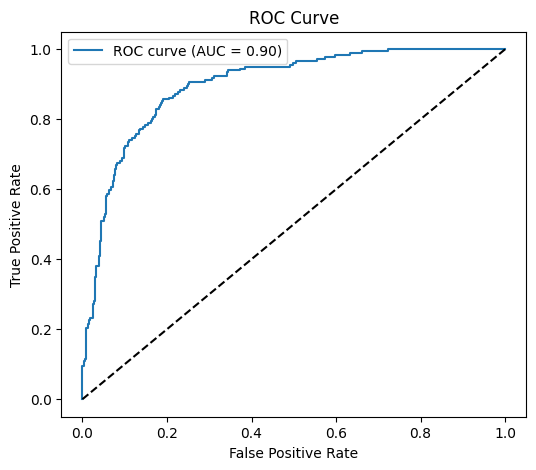

In [3]:
# ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

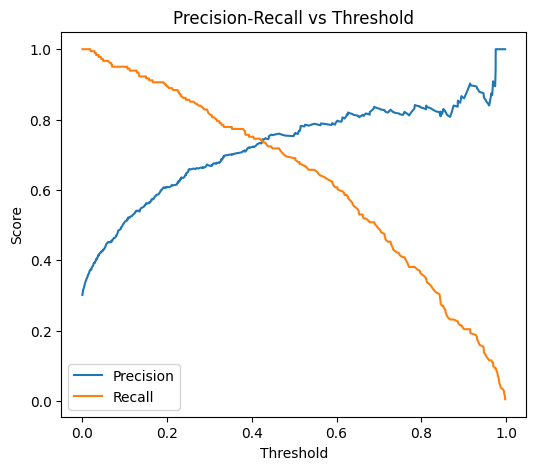

In [4]:
# Precision-Recall Curve
plt.figure(figsize=(6,5))
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.show()

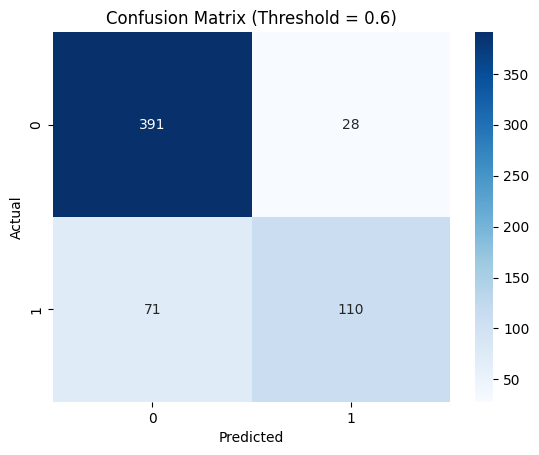

In [5]:
# ------------------------------------------------------------
# 5. Post-tuning: choose a custom threshold (e.g., 0.6 instead of 0.5)
# ------------------------------------------------------------
custom_threshold = 0.6
y_pred_custom = (y_probs >= custom_threshold).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix (Threshold = {custom_threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [6]:
# Classification Report
print(f"\nClassification Report (Threshold = {custom_threshold}):\n")
print(classification_report(y_test, y_pred_custom))


Classification Report (Threshold = 0.6):

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       419
           1       0.80      0.61      0.69       181

    accuracy                           0.83       600
   macro avg       0.82      0.77      0.79       600
weighted avg       0.83      0.83      0.83       600



# 📊 Academic Interpretation of Results (Post-Tuning the Decision Threshold)

The figures represent a **systematic post-tuning analysis** of decision thresholds in binary classification, aimed at balancing **sensitivity (recall)** and **specificity (precision)** for **cost-sensitive applications**.

---

## 1. ROC Curve (AUC = 0.90)

- The **ROC curve** shows the trade-off between **True Positive Rate (TPR)** and **False Positive Rate (FPR)** across thresholds.  
- Reported **AUC = 0.90** → indicates **strong discriminative power**, substantially above random guessing (AUC = 0.50).  
- Confirms classifier robustness, but **threshold optimization remains necessary** to reflect domain-specific error costs.

---

## 2. Precision–Recall vs Threshold

- **Low thresholds (≈ 0.1–0.2):**  
  - Recall > 0.9 (high sensitivity).  
  - Precision drops → many false positives.  

- **High thresholds (≈ 0.6–0.8):**  
  - Precision increases (fewer false positives).  
  - Recall decreases → more false negatives.  

- **Balanced region (~0.4–0.5):**  
  - Precision ≈ Recall.  
  - Represents a **neutral operating point**.  

👉 Domain-specific adjustment:  
- **Medical AI** → prioritize **high recall** (avoid missed cases).  
- **Fraud detection** → prioritize **high precision** (reduce false alarms).  

---

## 3. Confusion Matrix at τ = 0.6


\begin{bmatrix}
TN = 391 & FP = 28 \\
FN = 71 & TP = 110
\end{bmatrix}


- At threshold **τ = 0.6**:  
  - Fewer **false positives (28)**.  
  - More **false negatives (71)**.  
- Indicates preference for **precision over recall** → fewer alarms, but some positives missed.  

---

## 4. Classification Report (τ = 0.6)

- **Precision:** Class 0 = 0.85, Class 1 = 0.80  
- **Recall:** Class 0 = 0.93, Class 1 = 0.61  
- **Macro Avg F1 = 0.79**, **Weighted Avg F1 = 0.83**  
- **Accuracy = 83%** (slightly reduced but aligned with FP minimization).  

---

## 🎓 Discussion

This experiment demonstrates that:

- **Threshold selection directly governs classifier behavior.**  
- **ROC/AUC** measure ranking ability but do not prescribe an optimal threshold.  
- **Precision–Recall vs Threshold plots** provide **actionable trade-offs**.  
- **Confusion matrix & classification report** reveal **domain-aligned outcomes** when τ is tuned.  

✅ **Conclusion:** Post-tuning the decision threshold is an essential step for **responsible AI deployment**, ensuring that models are not only accurate but also **aligned with application-specific goals** in healthcare, finance, and imbalanced learning.  
